In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
from unicodedata import normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def recorrerColumnasTabla(tablaLimpia):
    tipos = tablaLimpia.dtypes
    for i in range(len(tablaLimpia.columns)):
        nombreColumna = tablaLimpia.columns[i]
        nombreNuevoColumna = nombreColumna.upper().strip().replace(" ", "")
        tablaLimpia = tablaLimpia.rename(columns={nombreColumna: nombreNuevoColumna})  # opcional
        if tipos[i] == 'O' and nombreNuevoColumna=='LOCATION':
            arregloPalabras = crearArregloDeUnique(pd.unique(tablaLimpia[nombreNuevoColumna]))
            tablaLimpia[nombreNuevoColumna] = remplazarUnique(arregloPalabras,tablaLimpia,nombreNuevoColumna,pd.unique(tablaLimpia[nombreNuevoColumna]))
            tablaLimpia[nombreNuevoColumna] = ponerSoloCiudades(tablaLimpia,nombreNuevoColumna)
    return tablaLimpia

def crearArregloDeUnique(columna):
    arregloLetras= []
    letra = ""
    for i in range(len(columna)):
        numeroenColumna = str(columna[i])
        if not(numeroenColumna=="nan"):
            numeroenColumna = numeroenColumna.upper().replace("/","").replace(".","").replace(",","-").replace("-"," ").replace(" ","-").replace("--","-")
            if not(numeroenColumna in arregloLetras):
                arregloLetras.append(numeroenColumna)
    return arregloLetras

def remplazarUnique(arregloNuevo,tablaLimpia,columna,arregloViejo):
    tablaSolucion = tablaLimpia[columna]
    for i in range(len(arregloNuevo)):
        for j in range(len(arregloViejo)):
            locationTemp = str(arregloViejo[j]).upper().replace("/","").replace(".","").replace(",","-").replace("-"," ").replace(" ","-").replace("--","-").replace(";","")
            if( locationTemp == str(arregloNuevo[i])):
                nuevaColumna = tablaSolucion.replace(str(arregloViejo[j]), str(arregloNuevo[i]))
                tablaSolucion = nuevaColumna
    return tablaSolucion

def ponerSoloCiudades(tablaLimpia,columna):
    tablaSolucion = tablaLimpia[columna]
    arreglo = tablaSolucion.unique()
    for i in range(len(arreglo)):
        arreglo[i] = str(arreglo[i])+ "-"
        separador = str(arreglo[i]).index('-')
        nombreCiudad = str(arreglo[i][0:separador])
        nombreCiudadLimpio = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1",normalize( "NFD", nombreCiudad), 0, re.I)
        nombreCiudadLimpio = normalize( 'NFC', nombreCiudadLimpio)
        nuevaColumna = tablaSolucion.replace(str(arreglo[i][:-1]),nombreCiudadLimpio)
        tablaSolucion = nuevaColumna
    #Los siguientes cambios son por excepciones muy particulares del dataset 
    tablaSolucion = tablaSolucion.replace('📍BOGOTA','BOGOTA')
    tablaSolucion = tablaSolucion.replace('MEDELLINBOGOTACOLOMBIA','MEDELLIN')
    tablaSolucion = tablaSolucion.replace('LA','GUAJIRA')
    tablaSolucion = tablaSolucion.replace('PASTOCOLOMBIA','PASTO')
    tablaSolucion = tablaSolucion.replace('VILLAVICENCIOMETACOLOMBIA','VILLAVICENCIO')
    tablaSolucion = tablaSolucion.replace('BOGOTACOLOMBIA','BOGOTA')
    tablaSolucion = tablaSolucion.replace('SPAINAMERICA','COLOMBIA')
    tablaSolucion = tablaSolucion.replace('CUNDINAMARCA','BOGOTA')
    tablaSolucion = tablaSolucion.replace('COLOMBIA~POPAYAN~CAUCA','POPAYAN')
    tablaSolucion = tablaSolucion.replace('','COLOMBIA')
    return tablaSolucion

def usersEnComun(arregloIDFiltro,arregloIDNull):
    arregloFinal = []
    for i in range(len(arregloIDFiltro)):
        if(arregloIDFiltro[i] in arregloIDNull) : arregloFinal.append(arregloIdFiltro[i])
    return arregloFinal

def rescatarIdConLocationNull(tablaSinNulos, tablaConNulos, arreglo):
    for i in range(len(arreglo)):
        tablaTemp = tablaConNulos[tablaConNulos['user'].str.contains(str(arreglo[i]), case=False)]
        if(len(tablaTemp) != 0):
            tablaTemp.loc[tablaTemp['user'] == '','user'] = 'colombia'
            tablaSinNulos = pd.concat([tablaSinNulos, tablaTemp])
    return tablaSinNulos

In [4]:
tablaTweets = pd.read_csv('tweets.csv') #dataset completo
tablaTweetsNotNull = tablaTweets[tablaTweets.location.notnull()] # dataset sin nulos en la columna location
tablaTweetsNull = tablaTweets[tablaTweets.location.isnull()] # dataset con nulos en la columna location
filtroColombia = tablaTweetsNotNull[tablaTweetsNotNull['location'].str.contains("colombia", case=False)] # filtro de los tweets que se hicieron en Colombia
# Las siguientes 4 lineas son de un codigo para tratar de vrificar si un mismo usuario aparce en la tabla
# de los tweets con localización null y no null en Colombia y agregarlo a la tabla de tweets con el valor
# respectivo de localización 
arregloIdNull = tablaTweetsNull.user.unique()
arregloIdFiltro = filtroColombia.user.unique()
arregloIdUsers = usersEnComun(arregloIdFiltro,arregloIdNull)
tablaCompleta = rescatarIdConLocationNull(filtroColombia,tablaTweetsNull,arregloIdUsers)
# Se limpia el dataset y se organiza la columna LOCATION para un mejor analisis 
filtroLimpio = recorrerColumnasTabla(tablaCompleta)
filtroLimpio

,USER,LOCATION,CREATED,TWEET,FAVCOUNT,COORDS,FOLLOWERS
3,@Amonnymous,MONTERIA,2020-04-11 01:31:20,"Colombia, país en el que ni una pandemia impid...",0,NaN,1643
52,@a_azurdia,COLOMBIA,2020-04-11 01:31:20,Nos vamos a volver a abrazar...FE !!!,0,NaN,1617
72,@jaaa2000,MEDELLIN,2020-04-11 01:31:21,Ni los perros ni los gatos 🐶🐱 te pueden contag...,0,NaN,79
90,@ReyOspina3,ATLANTICO,2020-04-11 01:31:21,👏👏🔥 Todas las felicitaciones al equipo humano ...,0,NaN,354
100,@La_Mara_VilIa,BARRANQUILLA,2020-04-11 01:31:21,Siento que estoy desperdiciando mi Lenceria en...,0,NaN,25994
...,...,...,...,...,...,...,...
22508,@Paulopineros,CALI,2020-04-11 01:38:49,"Jajajajajajaja.... Tal cuál, mejor descrito Im...",0,NaN,131
22526,@ingeniosolucio1,BARRANQUILLA,2020-04-11 01:38:50,@AlvaroUribeVel Para que insisten en que emple...,0,NaN,13
22555,@Aishasios,BOGOTA,2020-04-11 01:38:50,En días de pandemia; Daniel Quintero contrato...,0,NaN,1497
22669,@ArlexBueno,PEREIRA,2020-04-11 01:38:53,Este Domingo @CanalRCN presentará el documenta...,0,NaN,74


In [4]:
len(filtroLimpio)

439

In [5]:
len(tablaTweets)

22727

In [6]:
len(tablaTweetsNull)

8433

In [7]:
len(tablaTweetsNotNull)

14294

In [8]:
filtroLimpio.LOCATION.value_counts()

BOGOTA             139
COLOMBIA            99
MEDELLIN            47
BARRANQUILLA        26
CALI                18
MONTERIA             6
BUCARAMANGA          6
TUNJA                5
CUCUTA               5
PEREIRA              4
PASTO                4
POPAYAN              4
SANTA                4
MANIZALES            4
IBAGUE               4
VALLE                4
ANTIOQUIA            4
VILLAVICENCIO        4
CARTAGENA            4
SINCELEJO            3
SABANETA             3
JAMUNDI              2
GUAJIRA              2
SOACHA               2
NEIVA                2
VALLEDUPAR           2
VILLETA              2
ATLANTICO            1
BARRANCABERMEJA      1
CIENAGA              1
GUAMAL               1
GUAITARILLA          1
ANDES                1
CORDOBA              1
PAMPLONA             1
RIONEGRO             1
QUINDIO              1
VILLA                1
COROZAL              1
RETIRO               1
FUSAGASUGA           1
ITAGUI               1
RIOHACHA             1
PRADERA    

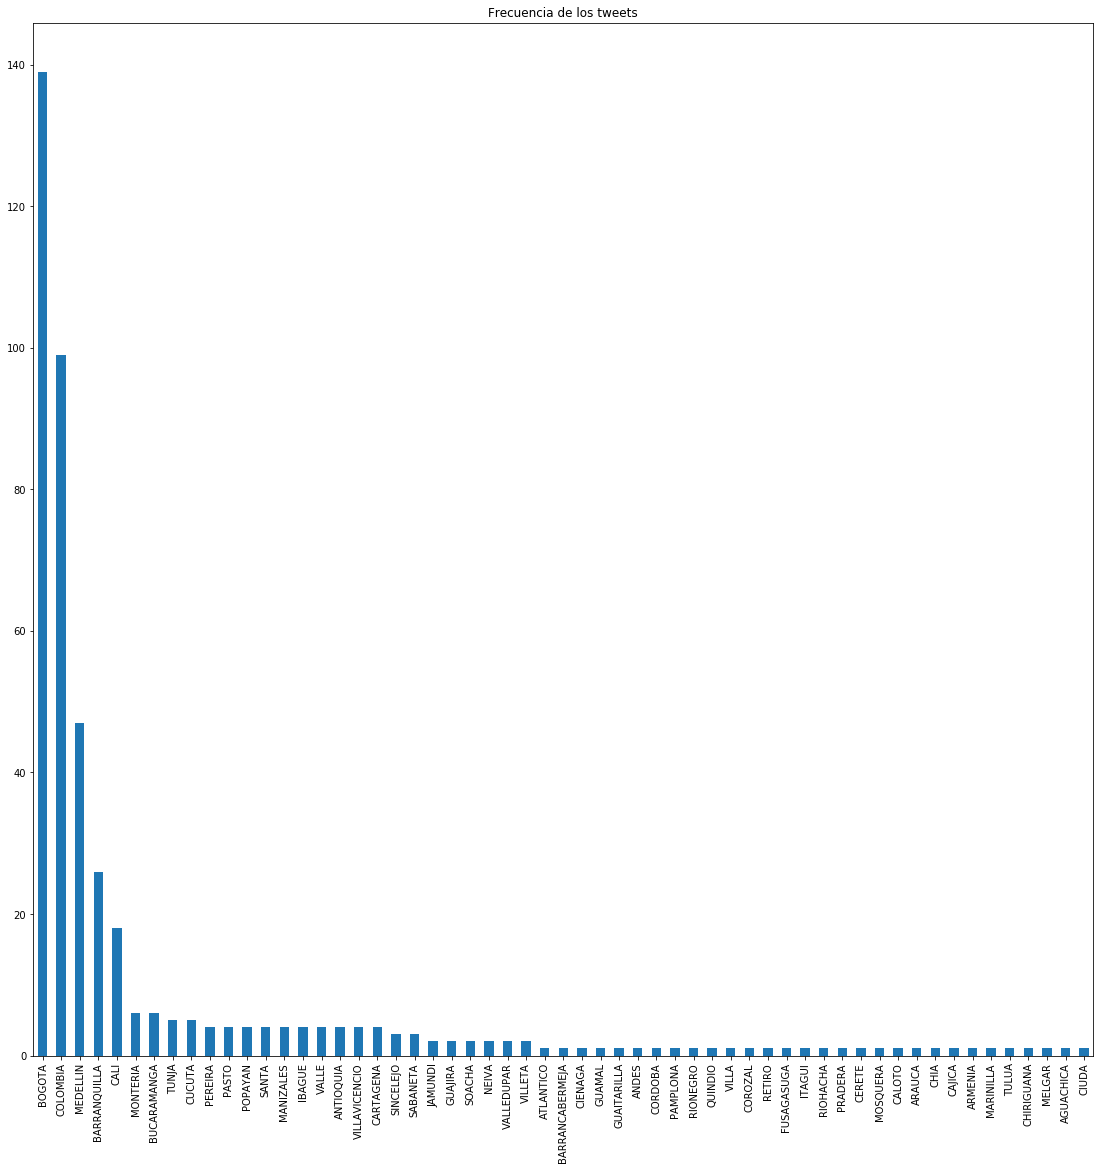

In [18]:
# Gráfico de barras de la frecuencia de los tweets por localización geográfica
plot = filtroLimpio.LOCATION.value_counts().plot(kind='bar',title='Frecuencia de los tweets',figsize=(19, 19),)

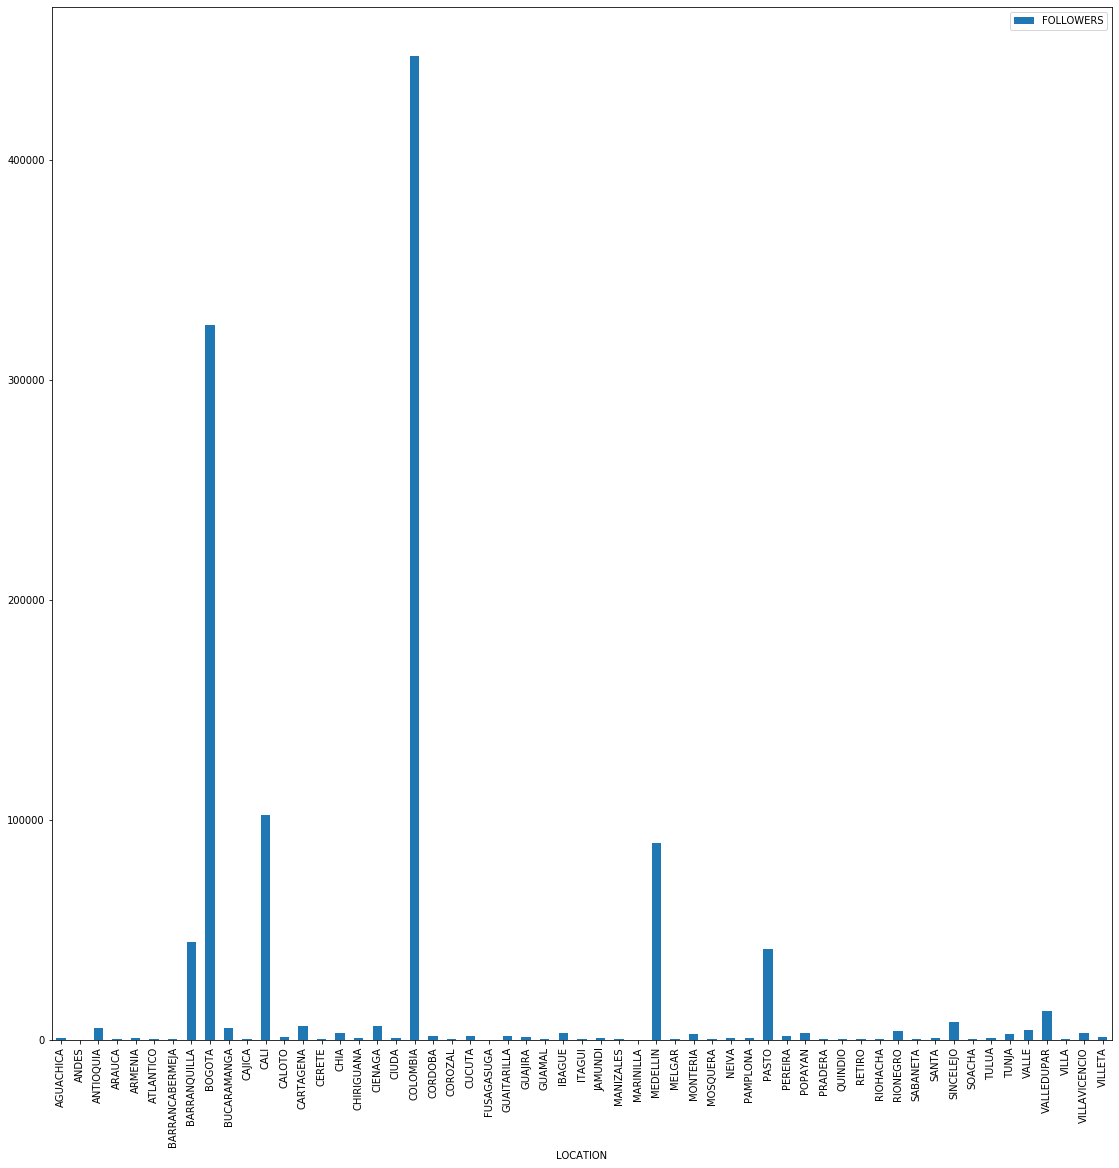

In [17]:
# Gráfico de barras de la cantidad de seguidores por usuario al montar un tweet en una localización geográfica
filtroLimpio.groupby('LOCATION')['FOLLOWERS'].sum().plot(kind = 'bar',legend='Reverse',figsize=(19, 19),)

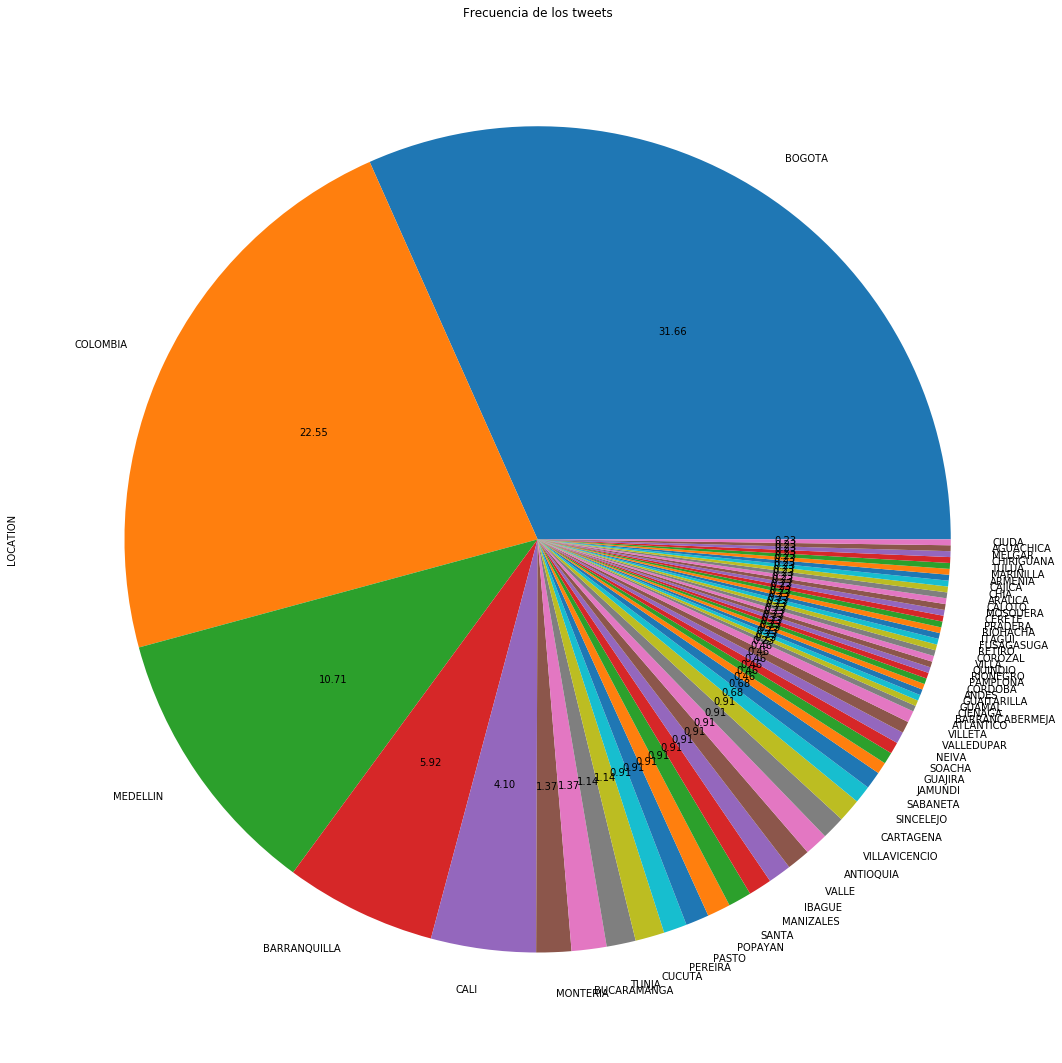

In [16]:
# Gráfico de tarta de la frecuencia de los tweets por localización geográfica
plot1 = filtroLimpio['LOCATION'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(19, 19),
                                            title='Frecuencia de los tweets')